<hr><font color="green"><h1>from file: 2.Mean_Median_Imputation</h1></font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [198]:
df = pd.read_csv('data/titanic.csv',usecols=['Age','Fare','Family','Survived'])

In [202]:
df.head()

,Survived,Family,Age,Fare
0,0,0,22.0,7.2500
1,1,0,38.0,71.2833
2,1,1,26.0,7.9250
3,1,0,35.0,53.1000
4,0,1,35.0,8.0500


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Family    887 non-null    int64  
 2   Age       887 non-null    float64
 3   Fare      887 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.8 KB


In [206]:
df.isnull().mean()

Survived    0.0
Family      0.0
Age         0.0
Fare        0.0
dtype: float64

In [208]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [212]:
X_train.shape, X_test.shape

((709, 3), (178, 3))

In [214]:
X_train.isnull().mean()

Family    0.0
Age       0.0
Fare      0.0
dtype: float64

In [216]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [218]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [220]:
X_train.sample(5)

,Family,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
187,1,40.0,15.5000,40.0,40.0,15.5000,15.5000
846,0,4.0,31.2750,4.0,4.0,31.2750,31.2750
11,1,58.0,26.5500,58.0,58.0,26.5500,26.5500
60,0,38.0,80.0000,38.0,38.0,80.0000,80.0000
389,1,21.0,7.7958,21.0,21.0,7.7958,7.7958


In [222]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  200.72797921318326
Age Variance after median imputation:  200.72797921318326
Age Variance after mean imputation:  200.72797921318326
Original Fare variable variance:  2281.5667254260047
Fare Variance after median imputation:  2281.5667254260047
Fare Variance after mean imputation:  2281.5667254260047


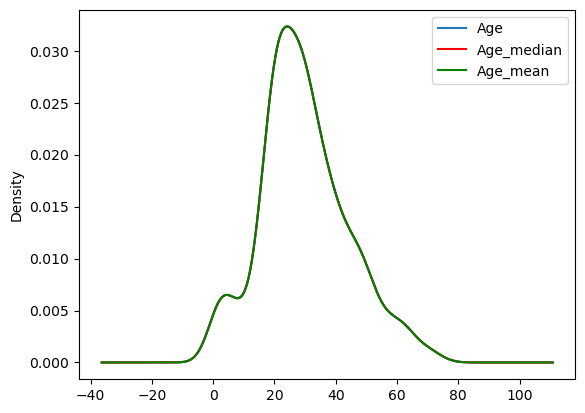

In [224]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

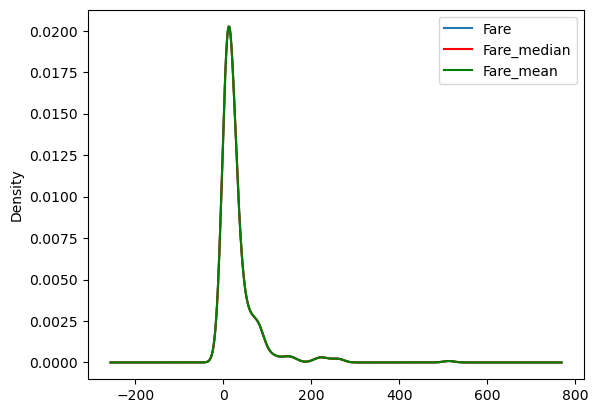

In [226]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [228]:
X_train.cov()

,Family,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Family,0.248376,0.037712,-0.385864,0.037712,0.037712,-0.385864,-0.385864
Age,0.037712,200.727979,96.683979,200.727979,200.727979,96.683979,96.683979
Fare,-0.385864,96.683979,2281.566725,96.683979,96.683979,2281.566725,2281.566725
Age_median,0.037712,200.727979,96.683979,200.727979,200.727979,96.683979,96.683979
Age_mean,0.037712,200.727979,96.683979,200.727979,200.727979,96.683979,96.683979
Fare_median,-0.385864,96.683979,2281.566725,96.683979,96.683979,2281.566725,2281.566725
Fare_mean,-0.385864,96.683979,2281.566725,96.683979,96.683979,2281.566725,2281.566725


In [230]:
X_train.corr()

,Family,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Family,1.000000,0.005341,-0.016209,0.005341,0.005341,-0.016209,-0.016209
Age,0.005341,1.000000,0.142868,1.000000,1.000000,0.142868,0.142868
Fare,-0.016209,0.142868,1.000000,0.142868,0.142868,1.000000,1.000000
Age_median,0.005341,1.000000,0.142868,1.000000,1.000000,0.142868,0.142868
Age_mean,0.005341,1.000000,0.142868,1.000000,1.000000,0.142868,0.142868
Fare_median,-0.016209,0.142868,1.000000,0.142868,0.142868,1.000000,1.000000
Fare_mean,-0.016209,0.142868,1.000000,0.142868,0.142868,1.000000,1.000000


<Axes: >

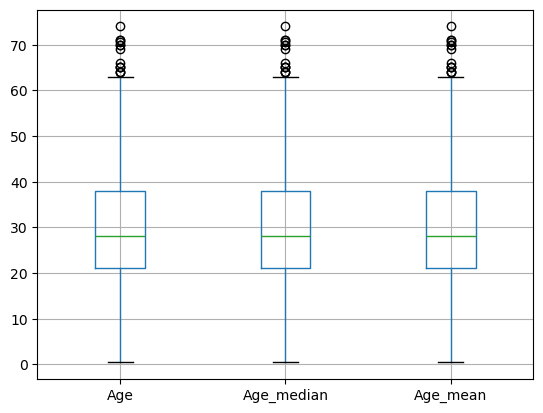

In [232]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

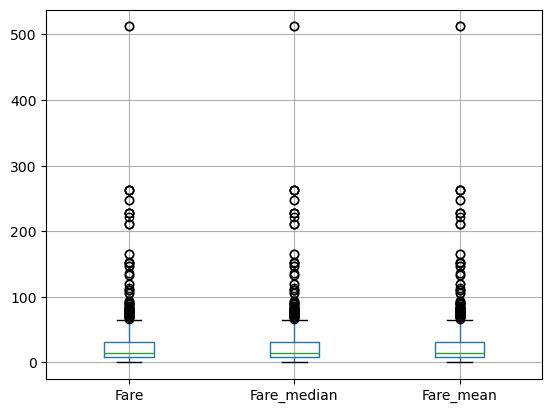

In [234]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

Using Sklearn

In [237]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 2)

In [239]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [241]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [243]:
trf.fit(X_train)

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [245]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [247]:
trf.named_transformers_['imputer2'].statistics_

array([31.54465783])

In [249]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [251]:
X_train

array([[62.    , 26.55  ,  1.    ],
       [40.    , 27.7208,  0.    ],
       [ 4.    , 16.7   ,  1.    ],
       ...,
       [54.    , 78.2667,  0.    ],
       [ 2.    , 26.    ,  1.    ],
       [28.    , 56.4958,  0.    ]])